In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Importing Data**

Importing from our train.csv file and preprocessing it.

In [45]:
df = pd.read_csv('./train.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
category = pd.cut(df.Pawpularity, bins=[0, 38, 101], labels=[-1, 1])
df.insert(12, 'Pawpularity Group', category)
# Now, we drop the original Pawpularity score after adding classified scores:
df.drop(df.columns[[-1]], axis=1, inplace=True)
df.head(10000)

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity Group
0,0,1,1,1,0,0,1,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0,0,1,1,0,0,-1
3,0,1,1,1,0,0,0,0,0,0,0,0,-1
4,0,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0,0,0,1,0,0,0,0,0,0,0,1,-1
9908,0,1,1,1,0,0,0,0,0,0,0,0,1
9909,0,1,1,1,0,0,0,0,1,1,0,0,-1
9910,0,1,1,1,0,0,0,0,1,0,0,0,-1


In [46]:
Y = df.loc[:, 'Pawpularity Group']
X = df.iloc[:, :-1]
# filter features
scaler = preprocessing.StandardScaler()
X_scaled_array = scaler.fit_transform(X)
y_array = np.array(Y)
Y = np.reshape(Y, (Y.shape[0], ))
# y_array = np.array(Y)
print("The shape of X:",X.shape)
print("The shape of Y:",Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

The shape of X: (9912, 12)
The shape of Y: (9912,)


The below code snippet is for generating our graphs and keeping it easy and consistent.

In [25]:
def generate_graph(title, x, y1, y2):
    plt.title(title)
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.plot(x, y1, "r-")
    plt.plot(x, y2, color="green")
    plt.xscale("log")
    plt.ylim([0.55, 0.65])
    plt.legend(['Training Acc', 'Test Acc'], loc='lower left')
    plt.show()

**Log Regression** 

First we will demonstrate accuracy from logistic regression with no penalty.

In [26]:
logreg = LogisticRegression(penalty='none', solver='saga')
logreg.fit(x_train, y_train)
train_acc = logreg.score(x_train, y_train)
test_acc = logreg.score(x_test, y_test)
print("NO REGULARIZATION")
print("Training Set Acc: {:.5%}".format(train_acc))
print("Testing Set Acc: {:.5%}".format(test_acc))

NO REGULARIZATION
Training Set Acc: 62.41645%
Testing Set Acc: 61.52295%


**Lasso**

In [27]:
cvals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_acc_lasso_list = []
test_acc_lasso_list = []
for cval in cvals:
    logreg = LogisticRegression(penalty='l1', C=cval, solver='saga')
    logreg.fit(x_train, y_train)
    logreg.fit(x_train, y_train)
    train_acc_lasso_iter = logreg.score(x_train, y_train)
    test_acc_lasso_iter = logreg.score(x_test, y_test)
    train_acc_lasso_list.append(train_acc_lasso_iter)
    test_acc_lasso_list.append(test_acc_lasso_iter)

In [28]:
for index in range(len(cvals)):
    print("L1 REGULARIZATION WITH C =", cvals[index])
    print("Training Set Acc: {:.5%}".format(train_acc_lasso_list[index]))
    print("Testing Set Acc: {:.5%}".format(test_acc_lasso_list[index]))
    print("///////////////////////////////////////////////")

L1 REGULARIZATION WITH C = 0.0001
Training Set Acc: 62.34077%
Testing Set Acc: 61.62380%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.001
Training Set Acc: 62.34077%
Testing Set Acc: 61.62380%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.01
Training Set Acc: 62.34077%
Testing Set Acc: 61.62380%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.1
Training Set Acc: 62.34077%
Testing Set Acc: 61.62380%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 1
Training Set Acc: 62.42906%
Testing Set Acc: 61.52295%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 10
Training Set Acc: 62.44167%
Testing Set Acc: 61.52295%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 100
Training Set Acc: 62.41645%
Testing Set Acc: 61.52295%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 1000
Training Set Acc: 62.41645%

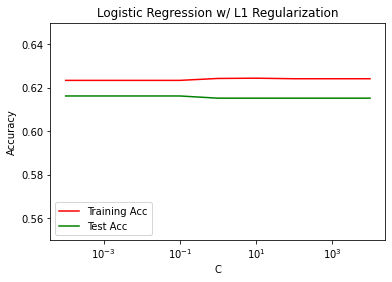

In [29]:
generate_graph("Logistic Regression w/ L1 Regularization", cvals, train_acc_lasso_list, test_acc_lasso_list)

**RIDGE**

In [42]:
train_acc_ridge_list = []
test_acc_ridge_list = []
for cval in cvals:
    logreg = LogisticRegression(penalty='l2', C=cval, solver='saga')
    logreg.fit(x_train, y_train)
    logreg.fit(x_train, y_train)
    train_acc_ridge_iter = logreg.score(x_train, y_train)
    test_acc_ridge_iter = logreg.score(x_test, y_test)
    train_acc_ridge_list.append(train_acc_ridge_iter)
    test_acc_ridge_list.append(test_acc_ridge_iter)

In [43]:
for index in range(len(cvals)):
    print("L2 REGULARIZATION WITH C =", cvals[index])
    print("Training Set Acc: {:.5%}".format(train_acc_ridge_list[index]))
    print("Testing Set Acc: {:.5%}".format(test_acc_ridge_list[index]))
    print("///////////////////////////////////////////////")

L2 REGULARIZATION WITH C = 0.0001
Training Set Acc: 62.42906%
Testing Set Acc: 61.27080%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.001
Training Set Acc: 62.42906%
Testing Set Acc: 61.27080%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.01
Training Set Acc: 62.42906%
Testing Set Acc: 61.27080%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.1
Training Set Acc: 62.49212%
Testing Set Acc: 61.32123%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 1
Training Set Acc: 62.52995%
Testing Set Acc: 61.11952%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 10
Training Set Acc: 62.52995%
Testing Set Acc: 61.11952%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 100
Training Set Acc: 62.52995%
Testing Set Acc: 61.11952%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 1000
Training Set Acc: 62.52995%

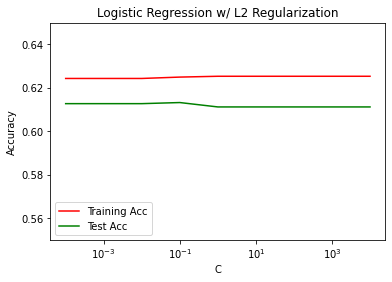

In [44]:
generate_graph("Logistic Regression w/ L2 Regularization", cvals, train_acc_ridge_list, test_acc_ridge_list)

Now we will implement polynomial feature transformation to see how it influences L1 and L2 regularization.

In [47]:
poly = PolynomialFeatures()
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [48]:
import warnings #upcoming things had convergence warnings, this removes them
warnings.filterwarnings('ignore')

**Lasso w/ Polynomial Transformation**

In [37]:
cvals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_acc_lasso_list = []
test_acc_lasso_list = []
for cval in cvals:
    logreg = LogisticRegression(penalty='l1', C=cval, solver='saga')
    logreg.fit(x_train, y_train)
    logreg.fit(x_train, y_train)
    train_acc_lasso_iter = logreg.score(x_train, y_train)
    test_acc_lasso_iter = logreg.score(x_test, y_test)
    train_acc_lasso_list.append(train_acc_lasso_iter)
    test_acc_lasso_list.append(test_acc_lasso_iter)

In [38]:
for index in range(len(cvals)):
    print("L1 REGULARIZATION WITH C =", cvals[index])
    print("Training Set Acc: {:.5%}".format(train_acc_lasso_list[index]))
    print("Testing Set Acc: {:.5%}".format(test_acc_lasso_list[index]))
    print("///////////////////////////////////////////////")

L1 REGULARIZATION WITH C = 0.0001
Training Set Acc: 62.16421%
Testing Set Acc: 62.32980%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.001
Training Set Acc: 62.16421%
Testing Set Acc: 62.32980%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.01
Training Set Acc: 62.16421%
Testing Set Acc: 62.32980%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 0.1
Training Set Acc: 62.18943%
Testing Set Acc: 62.32980%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 1
Training Set Acc: 62.83264%
Testing Set Acc: 61.72466%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 10
Training Set Acc: 62.74436%
Testing Set Acc: 61.32123%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 100
Training Set Acc: 62.75697%
Testing Set Acc: 61.42209%
///////////////////////////////////////////////
L1 REGULARIZATION WITH C = 1000
Training Set Acc: 62.75697%

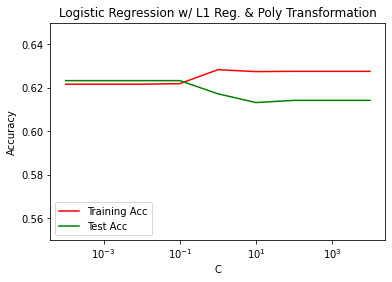

In [39]:
generate_graph("Logistic Regression w/ L1 Reg. & Poly Transformation", cvals, train_acc_lasso_list, test_acc_lasso_list)

**Ridge w/ Polynomial Transformation**

In [49]:
train_acc_ridge_list = []
test_acc_ridge_list = []
for cval in cvals:
    logreg = LogisticRegression(penalty='l2', C=cval, solver='saga')
    logreg.fit(x_train, y_train)
    logreg.fit(x_train, y_train)
    train_acc_ridge_iter = logreg.score(x_train, y_train)
    test_acc_ridge_iter = logreg.score(x_test, y_test)
    train_acc_ridge_list.append(train_acc_ridge_iter)
    test_acc_ridge_list.append(test_acc_ridge_iter)

In [50]:
for index in range(len(cvals)):
    print("L2 REGULARIZATION WITH C =", cvals[index])
    print("Training Set Acc: {:.5%}".format(train_acc_ridge_list[index]))
    print("Testing Set Acc: {:.5%}".format(test_acc_ridge_list[index]))
    print("///////////////////////////////////////////////")

L2 REGULARIZATION WITH C = 0.0001
Training Set Acc: 62.22727%
Testing Set Acc: 62.07766%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.001
Training Set Acc: 62.22727%
Testing Set Acc: 62.07766%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.01
Training Set Acc: 62.26510%
Testing Set Acc: 62.07766%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 0.1
Training Set Acc: 62.61824%
Testing Set Acc: 61.22037%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 1
Training Set Acc: 62.90831%
Testing Set Acc: 60.91780%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 10
Training Set Acc: 62.93354%
Testing Set Acc: 60.96823%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 100
Training Set Acc: 62.93354%
Testing Set Acc: 60.96823%
///////////////////////////////////////////////
L2 REGULARIZATION WITH C = 1000
Training Set Acc: 62.93354%

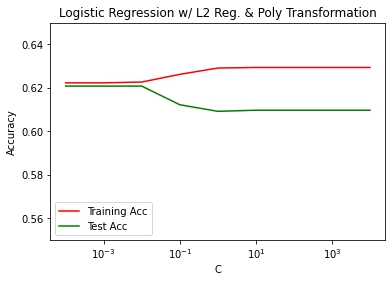

In [51]:
generate_graph("Logistic Regression w/ L2 Reg. & Poly Transformation", cvals, train_acc_ridge_list, test_acc_ridge_list)
